# Nozzle map calculation from Gasdynamics consideration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parametri di esempio (modificare con i tuoi dati)
pt = 3e5      # [Pa]
Tt = 1200.0        # [K]

A = 0.55            # [m^2]
gamma = 1.33       # [-] cp/cv ratio of exhaust gases
R = 287.0          # [J/(kg K)] TODO: calculate with src/functions/thermodynamics_functions
p_amb = 101325

$\dot m_{out} = \frac{p^0 A_{out}}{\sqrt{R T^0}} f(M_{out}) = {\dot m_{in}} $

$(T^0)_{in} = (T^0)_{out}$

$(p^0)_{in} = (p^0)_{out}$

$f(M) = \sqrt{\gamma} M \left( 1 + \frac{\gamma - 1}{2} M^2 \right) ^ {-\frac{\gamma + 1}{2(\gamma - 1)}}$


In [12]:
def mass_flow_per_area_from_M(pt, Tt, M, gamma, R):
    f_M = np.sqrt(gamma) * M * ( 1 + (gamma - 1) / 2 * M ** 2 ) ** ( - ( ( gamma + 1 ) / ( 2 * (gamma - 1) ) ) )
    mf = pt / np.sqrt(R * Tt) * f_M
    return mf

def p_over_pt_from_M(M, gamma):
    """
    total pressure definition
    """
    return (1 + (gamma-1)/2 * M**2)**(-gamma/(gamma-1))

def M_from_p_over_pt(p_over_pt, gamma):
    p_over_pt = np.asarray(p_over_pt)
    if np.any(p_over_pt <= 0) or np.any(p_over_pt > 1):
        raise ValueError("p_over_pt must be in the interval (0, 1].")
    M_squared = (2 / (gamma - 1)) * (p_over_pt**(-(gamma - 1)/gamma) - 1)
    M = np.sqrt(M_squared)
    M = np.where(M < 1.0, M, np.nan)
    return M

6.837604964495939e-05


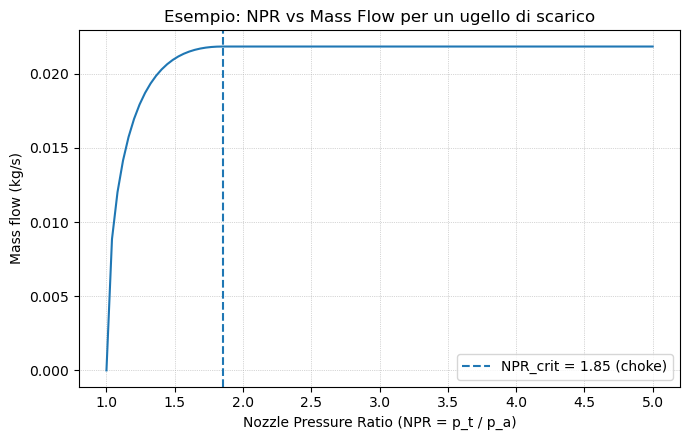

In [ ]:
NPR_vals = np.linspace(1, 5, 100)
pt_vals = NPR_vals * p_amb

mdot_corr_vals = np.zeros_like(NPR_vals)

p_over_pt_crit = p_over_pt_from_M(1, gamma)
NPR_crit = 1.0 / p_over_pt_crit

for i, pt in enumerate(pt_vals):
    p_ratio = p_amb / pt
    if p_ratio < p_over_pt_crit:
        M_exit = 1.0
        mdot_corr_vals[i] = A * mass_flow_per_area_from_M(pt, Tt, M_exit, gamma, R) * np.sqrt(Tt) / pt
    else:
        M_root = M_from_p_over_pt(p_ratio, gamma)
        mdot_corr_vals[i] = A * mass_flow_per_area_from_M(pt, Tt, M_root, gamma, R) * np.sqrt(Tt) / pt

# Plot
plt.figure(figsize=(7,4.5))
plt.plot(NPR_vals, mdot_corr_vals)
plt.axvline(NPR_crit, linestyle='--', label=f'NPR_crit = {NPR_crit:.2f} (choke)')
plt.xlabel('Nozzle Pressure Ratio (NPR = p_t / p_a)')
plt.ylabel('Mass flow (kg/s)')
plt.title('Esempio: NPR vs Mass Flow per un ugello di scarico')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
